In [33]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.

In [9]:
df = pd.read_csv("assets/fcc-forum-page.csv", index_col="date")
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [11]:
# Calculate the 2.5th and 97.5th percentiles of page views
lower_bound = df['value'].quantile(0.025)
upper_bound = df['value'].quantile(0.975)

# Filter the DataFrame to exclude days with page views outside the bounds
df_cleaned = df[(df['value'] >= lower_bound) & (df['value'] <= upper_bound)]

# Display the cleaned DataFrame
df_cleaned

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.

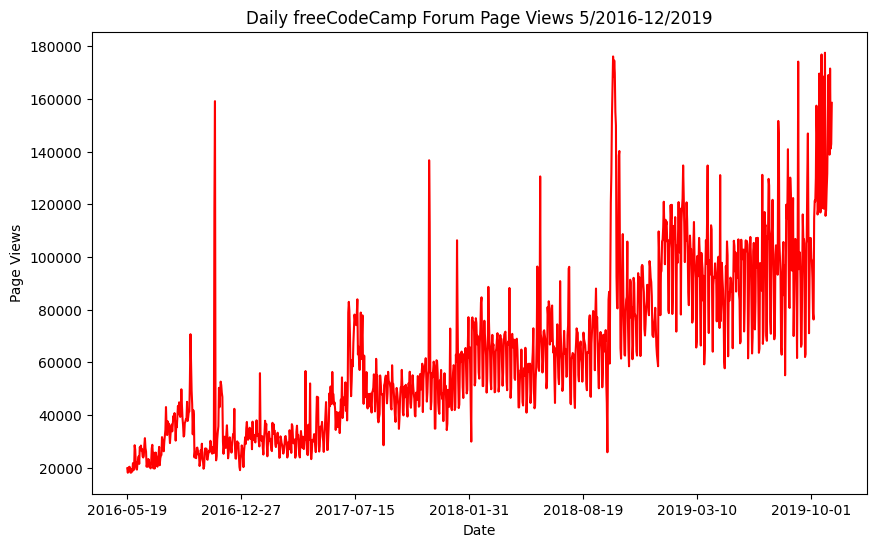

In [12]:
# Create figure and plot
fig, ax = plt.subplots(figsize=(10, 6))
df_cleaned.plot(kind='line', ax=ax, color='r', legend=False)

# Set titles and labels
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")

# Display the plot
plt.show()

Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

In [ ]:
# Copy and reset index to extract year and month
df_bar = df_cleaned.copy()
df_bar['date'] = pd.to_datetime(df_bar.index)
df_bar['year'] = df_bar['date'].dt.year
df_bar['month'] = df_bar['date'].dt.month

# Group by year and month, calculate mean
df_bar = df_bar.groupby(['year', 'month']).mean()

# Unstack the multi-index to pivot the DataFrame
df_bar = df_bar.unstack()

# Create figure and plot
fig, ax = plt.subplots(figsize=(10, 6))
df_bar.plot(kind='bar', ax=ax)

# Set titles and labels
ax.set_title("Average Daily Page Views")
ax.set_xlabel("Years")
ax.set_ylabel("Average Page Views")
ax.legend(title="Months", labels=pd.date_range(start='2020-01-01', end='2020-12-01', freq='MS').strftime('%B'))

# Display the plot
plt.show()

/tmp/ipykernel_134388/1122769010.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


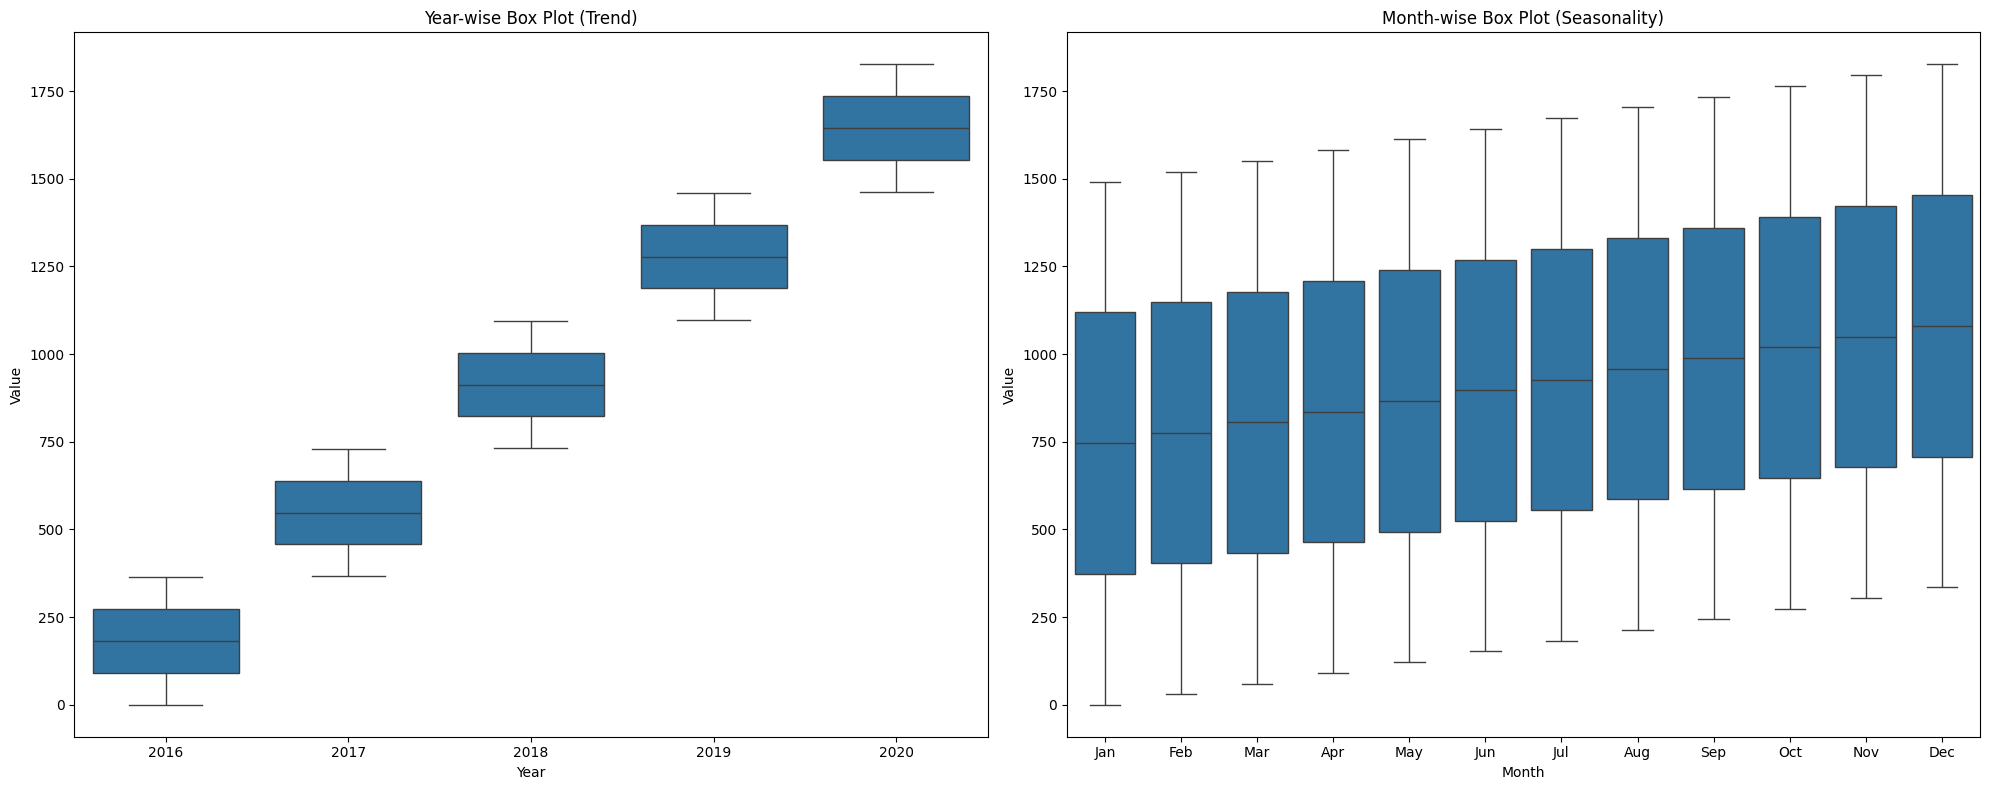

In [34]:
# Prepare Data
def prepare_data():
    # Create a DataFrame from the provided data
    df = pd.DataFrame({
        'date': pd.date_range(start='2016-01-01', end='2020-12-31'),
        'value': pd.Series(range(1827))
    })
    return df

def draw_box_plot():
    # Prepare the data
    df = prepare_data()
    
    # Extract year and month from the date
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    
    # Create figure and axes
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    # Draw Year-wise Box Plot (Trend)
    sns.boxplot(x='year', y='value', data=df, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Value')

    # Draw Month-wise Box Plot (Seasonality)
    sns.boxplot(x='month', y='value', data=df, ax=axes[1])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Value')
    axes[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()

# Example usage
draw_box_plot()